# Classification bayésienne

$\quad$

$\quad$

$\quad$

$\quad$

$\quad$

$\quad$

Mercredi 1er Décembre 2021

$\quad$


In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression


import numpy as np
import matplotlib.pyplot as plt

Algorithme d'apprentissage pour la **classification** (binaire) : prévision de l'appartenance à une classe $y \in \{0,1\}$ pour un $x\in \mathbb{R}^d$

Apprentissage supervisé :
- Données : $x_1,\ldots, x_n \in \mathbb{R}^d$
- Classes associées: $y_1,\ldots, y_n \in \{0,1\}$




Exemple : classification de variété d'iris (bleu: versicolor, rouge: setosa)



In [2]:
iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = np.array(iris["target"]) 


versicolor = (y == 1)
setosa = (y == 0)
virginica = (y == 2)

def plot_dataset1(axes):
    plt.scatter(X[versicolor,0], X[versicolor,1], c='blue')
    plt.scatter(X[setosa,0], X[setosa, 1], c='red')

    plt.xlabel("Longueur de la pétale")
    plt.ylabel("Largeur de la pétale")
    
    plt.axis([xmin, xmax, ymin, ymax])

xmin, xmax = 0, 6
ymin, ymax = 0, 2
axes1 = [xmin, xmax, ymin, ymax]

In [5]:
plt.figure(figsize=(10,8))
plot_dataset1(axes1)

**Plan**

1. Méthodes "déterministes"
2. Méthodes "déterministes" basées sur des modèles probabilistes (Maximum de vraisemblance / Maximum a posteriori)
3. Méthode bayésienne

## 1. Méthodes déterministes  

**Fonction discriminante** : $\hat y(x) \in \mathbb{R}$

$$\hat y(x) \geqslant 0 \quad\Longleftrightarrow\quad \text{appartenance à la classe 1}$$ 


**Paramétrisation :**

$$\hat y_\theta(x) =\langle w,x \rangle + b$$


- paramètres : $\theta = (w,b)$
- $w$ orientation de la frontière de décision 
- plus $||w||$ est petit, plus la marge (la région de transition) $\hat y_\theta(x) \in [-1,1]$ sera grande. 


Méthodes **déterministes**:

- Méthode aux moindres carrés :

$$
\boxed{\underset{\theta}{\min} || y_i - \hat y_\theta(x_i)||^2}
$$

- Méthode Support Vector Machine (SVM) :

$$
\boxed{
\underset{\begin{subarray}\ w \in \mathbb{R}^d,\ b \in \mathbb{R} \\
y_i\, \hat y_\theta(x_i)\ \geqslant\ 1
\end{subarray}}{\min} \frac{1}{2}|| w ||^2
}
$$

In [7]:
def plot_svc_decision_boundary(X, y, xmin, xmax):

    
    svm_clf = SVC(kernel="linear", C=float("inf"))
    svm_clf.fit(X,y)
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    

    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    plot_dataset1(axes1)
    plt.title('SVM')

In [8]:
def plot_reg_decision_boundary(X, y, xmin, xmax):
    reg_clf = LinearRegression().fit(X,2*y-1)
    
    w = reg_clf.coef_
    b = reg_clf.intercept_

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]


    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plot_dataset1(axes1)
    plt.title('Regression linéaire')

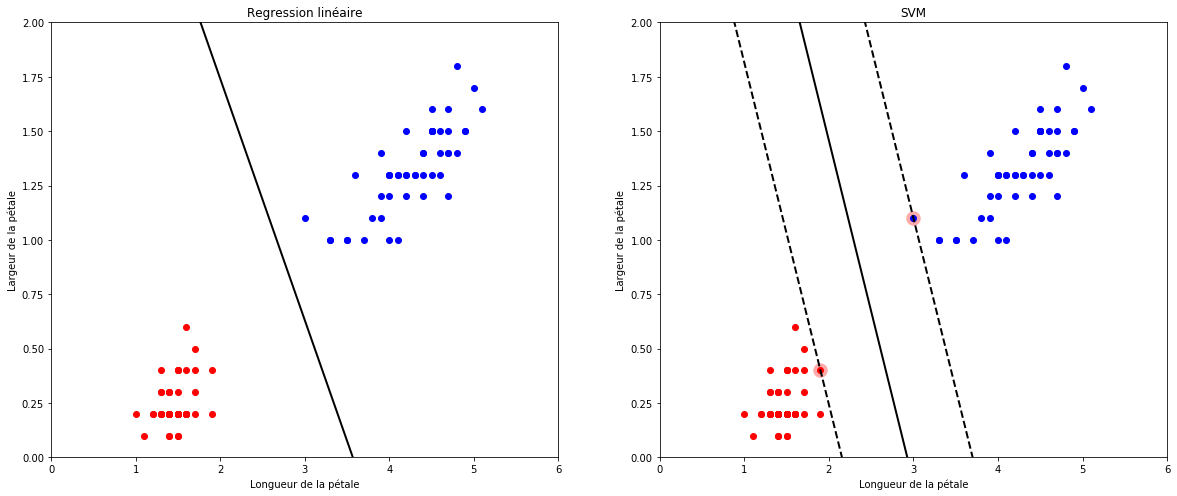

In [14]:
iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = np.array(iris["target"]) 

versicolor = (y == 1)
setosa = (y == 0)
virginica = (y == 2)

test1 = versicolor | setosa

xmin, xmax = 0, 6
ymin, ymax = 0, 2

plt.figure(figsize=(20,8))
plt.subplot(122)
plot_svc_decision_boundary(X[test1], y[test1], xmin, xmax)
plt.subplot(121)
plot_reg_decision_boundary(X[test1], y[test1], xmin, xmax)

## 2. Méthodes déterministes basées sur des modèles probabilistes (Maximum de vraisemblance / Maximum a posteriori)

$\quad$

**Fonction discriminante (2)** : $\hat y(x) \in [0,1]$ 

$$\hat y(x) \geqslant 0.5 \quad\Longleftrightarrow\quad \text{appartenance à la classe 1}$$ 


Paramétrisation :

$$\hat y_\theta(x) = \color{blue}{\sigma}(\langle w,x \rangle + b) \in [0,1]$$

- paramètres : $\theta = (w,b)$
- fonction softmax : 
$$\sigma : a \in \mathbb{R} \mapsto \frac{1}{1+\exp(-a)} \in [0,1]$$

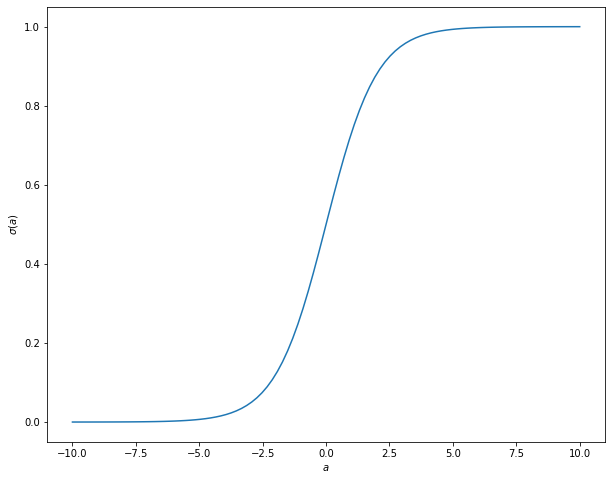

In [17]:
sigma = lambda a:1/(1+np.exp(-a))

plt.figure(figsize=(10,8))
a = np.linspace(-10,10,100)
plt.plot(a, sigma(a))
plt.ylabel('$\sigma(a)$')
plt.xlabel('$a$')
plt.show()

**Modèle probabiliste :**  

$Y$ sachant $\{X = x\}$ suit une loi de Bernouilli de paramètre $\hat y_\theta(x)$

$$\mathcal{L}(Y|X = x) = \text{Ber}(\hat y_\theta(x))$$

- $P(Y = 1|X=x)  = \hat y_\theta(x)$ 
- $P(Y = 0|X=x)  = 1-\hat y_\theta(x)$ 

$\quad$

Remarque: pas de modélisation de la loi complète $P(X,Y) = P(Y) P(X|Y)$, pas de modélisation de la génération de données pour chaque classe

$\to$ modèle discriminant


In [18]:


def plot_proba_model(X, y, xmin, xmax, ymin, ymax):    
    w = 8*np.array([-0.1,-1.])
    b = 8*1.05
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    y0 = np.linspace(ymin, ymax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    X,Y = np.meshgrid(x0,y0)
    Z = sigma(w[0]*X + w[1]*Y + b)
    plt.contourf(X,Y,Z, 20, alpha=0.2)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plot_dataset1(axes1)
    plt.colorbar()


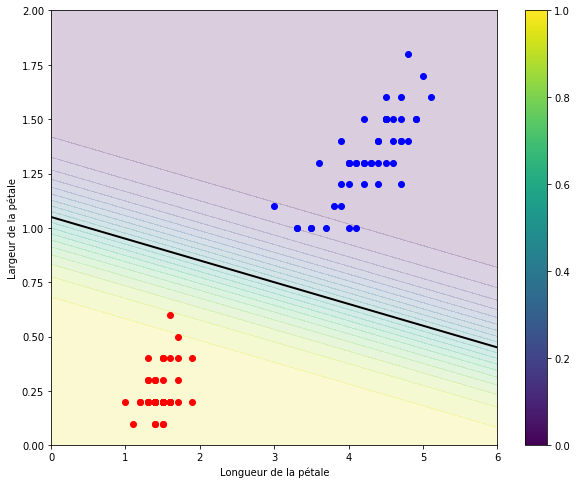

In [19]:
plt.figure(figsize=(10,8))
plot_proba_model(X[test1], y[test1], xmin, xmax, ymin, ymax)

**Vraisemblance et binary cross-entropy**


- probabilité d'obtenir la classe $y$ sachant $x$:
$$P(Y = y|X = x)  = \hat y_\theta(x)^{y}\,\, (1-\hat y_\theta(x))^{1-y} = \begin{cases}
\hat y_\theta(x) &si\ y = 1\\
(1-\hat y_\theta(x)) &si\ 1-y = 1 
\end{cases}$$
- Vraisemblance
\begin{align*}V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n) &= \prod_{i=1}^n P(Y_i = y_i| X_i = x_i) =  \prod_{i=1}^n \hat y_\theta(x_i)^{y_i} (1-y_\theta(x_i))^{1-y_i}
\end{align*}
- log-vraisemblance  :
\begin{align*}
\log V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n) &= \sum_{i=1}^n y_i \log \hat y_\theta(x_i) + (1-y_i) \log (1-\hat y_\theta(x_i))
\end{align*}

$\to$ "binary cross-entropy" entre les distributions $(y_1,\ldots, y_n)$ et les $(\hat y_\theta(x_1),\ldots, \hat y_\theta(x_n))$ 





**Estimation du maximum de Vraisemblance -- MLE (Maximul Likelyhood Estimation)**

$$\boxed{\hat \theta_{\text{MLE}} = \underset{\theta}{\text{argmax}}  \log V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n)}$$

$\to$ estimation ponctuelle du paramètre le plus cohérent avec les données

$\to$ méthode de gradient $\theta = (w, b)$ :
\begin{align*}
w^{(k+1)} = w^{(k)} - \tau \sum_{i=1}^n (\hat y_\theta(x_i) - y_i)\, x_i
\end{align*}

$\to$ $\hat\theta_{\text{MLE}} = F(Y_1,\ldots, Y_n| X_1,\ldots X_n)$ : variable aléatoire qui approche le vrai paramètre $\theta_\ast$ tel que  $\mathcal{L}(Y|X = x) = \text{Ber}(\hat y_{\theta^\ast}(x))$ quand $n\to+\infty$

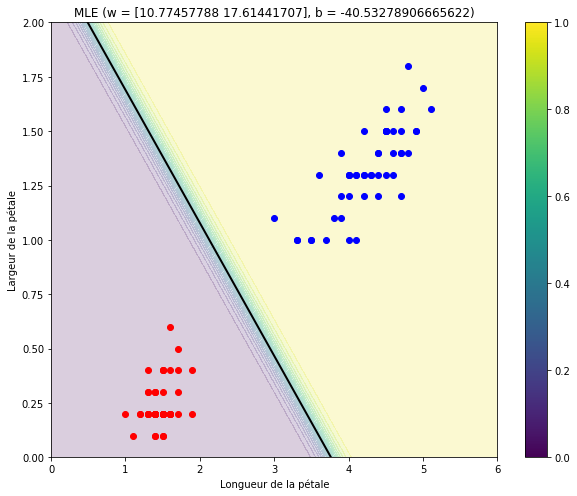

In [21]:

def plot_logreg_model(X, y, xmin, xmax, ymin, ymax):    
    logreg_clf = LogisticRegression(penalty='none',solver='lbfgs').fit(X, y)
    w = logreg_clf.coef_[0]
    b = logreg_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    y0 = np.linspace(ymin, ymax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    X,Y = np.meshgrid(x0,y0)
    Z = sigma(w[0]*X + w[1]*Y + b)
    plt.contourf(X,Y,Z, 20, alpha=0.2)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plot_dataset1(axes1)
    plt.title("MLE (w = "+str(w)+', b = '+str(b)+')')
    plt.colorbar()

plt.figure(figsize=(10,8))
plot_logreg_model(X[test1], y[test1], xmin, xmax, ymin, ymax)


**Estimation du maximum a posteriori -- MAP (Maximum APosteriori)**

Précédemment : $(X,Y)$ avec $\mathcal{L}(Y|X = x) = \text{Ber}(\hat y_{\theta^\ast}(x))$ avec $\theta^\ast$ fixé

Maintenant : $(X,Y, \color{red}{\Theta})$ avec $\mathcal{L}(Y|X = x, \Theta = \theta) = \text{Ber}(\hat y_{\color{red}{\theta}}(x))$
- Hypothèse: $\Theta$ est aléatoire et suit une loi dite **a priori** 
- Exemple : $\Theta \sim \mathcal{N}(0,\alpha^{-1}\, \text{Id})$  

$\to$ on affecte un poids sur chaque modèle : connaissance-préférence-ignorance a priori  








- Loi a posteriori définie par la règle de Bayes ($P(A|B) = P(B|A)\, P(A)\, /\, P(B)$)

\begin{align*}
P(\theta |y_1,\ldots, y_n, \color{blue}{x_1,\ldots, x_n}) &= \frac{P(y_1,\ldots, y_n | \color{blue}{x_1,\ldots, x_n},  \theta) \color{red}{P(\theta |\color{blue}{x_1,\ldots, x_n})}}{P(y_1,\ldots, y_n|\color{blue}{x_1,\ldots, x_n})} = \frac{V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n) \color{red}{P(\theta)}}{P(y_1,\ldots, y_n | \color{blue}{x_1,\ldots, x_n})}\\
\end{align*}

- Logarithme de la loi a posteriori 

\begin{align*}
\log P(\theta |y_1,\ldots, y_n, x_1,\ldots, x_n)\quad & = \quad \log V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n)\quad \color{red}{+\quad \log  P(\theta)}\quad -\quad \log P(y_1,\ldots, y_n| \color{blue}{x_1,\ldots, x_n})\\
\end{align*}

- **Maximum a posteriori** :

$$\boxed{\hat \theta_{\text{MAP}} = \quad\underset{\theta}{\text{argmax}}\quad  \log P(\theta |y_1,\ldots, y_n, x_1,\ldots, x_n) \quad=\quad \underset{\theta}{\text{argmax}}\quad  \log V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n) \color{red}{+ \log  P(\theta)}}$$

Pour loi Gaussienne: $\color{red}{\log P(\theta)} = \log \left(C \exp(- \alpha ||\theta||^2/2)\right) = \tilde C - \frac{\alpha}{2} \color{red}{||\theta||^2}$


$\to$ L'a priori Gaussien force à minimiser la norme de $\theta$ $\Leftrightarrow$ régularisation 

$\to$ L'a priori uniforme (poids uniforme sur tout les modèles) revient au maximum de vraisemblance classique 

$\to$ sélection du meilleur modèle en tenant compte des éventuelles préférences 



**Comparaison MLE et MAP**



```python
# MLE
MLE_clf = LogisticRegression(penalty='none',solver='lbfgs').fit(X, y)
w = MLE_clf.coef_[0]
b = MLE_clf.intercept_[0]

# MAP
MAP_clf = LogisticRegression(penalty='l2',solver='lbfgs').fit(X, y)
w = MAP_clf.coef_[0]
b = MAP_clf.intercept_[0]
```

In [22]:

def plot_map_model(X, y, xmin, xmax, ymin, ymax):    
    logreg_clf = LogisticRegression(penalty='l2',solver='lbfgs').fit(X, y)
    w = logreg_clf.coef_[0]
    b = logreg_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    y0 = np.linspace(ymin, ymax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    X,Y = np.meshgrid(x0,y0)
    Z = sigma(w[0]*X + w[1]*Y + b)
    plt.contourf(X,Y,Z, 20, alpha=0.2)
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plot_dataset1(axes1)
    plt.title("MAP (w = "+str(w)+', b = '+str(b)+')')
    plt.colorbar()



In [23]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plot_logreg_model(X[test1], y[test1], xmin, xmax, ymin, ymax)
plt.subplot(122)    
plot_map_model(X[test1], y[test1], xmin, xmax, ymin, ymax)

## 3. Méthode bayésienne pour la classification

Maintenant : $(X,Y, \color{red}{\Theta})$ avec $\mathcal{L}(Y|X = x, \Theta = \theta) = \text{Ber}(\hat y_{\color{red}{\theta}}(x))$
- Hypothèse: $\Theta$ est aléatoire et suit une **loi a priori** 

- Observations $\Rightarrow$ poids sur les modèles sont mis à jours par la **loi a posteriori** :

$$\color{blue}{P(\theta |y_1,\ldots, y_n, x_1,\ldots, x_n)} = \frac{V_\theta(y_1,\ldots, y_n| x_1,\ldots, x_n) \color{red}{P(\theta)}}{P(y_1,\ldots, y_n| x_1,\ldots, x_n)}$$

- Nouvelle prédiction : $$P(y |y_1,\ldots, y_n, x_1,\ldots, x_n, x) = \int P(y |x,\theta)\color{blue}{P(\theta |y_1,\ldots, y_n, x_1,\ldots, x_n)} d\theta$$ 


**Principale difficulté** : on ne connait pas complètement la loi a posteriori car le dénominateur s'écrit

$$P(y_1,\ldots, y_n| x_1,\ldots, x_n) = \int P(y_1,\ldots, y_n| x_1,\ldots, x_n,\theta) P(\theta)\, d\theta$$



Plusieurs méthodes pour estimer $\color{blue}{P(\theta |y_1,\ldots, y_n, x_1,\ldots, x_n)}$ :

**Approximation quadratique (ou de Laplace) de la loi a posteriori**

$$P(\theta|y_1,\ldots, y_n, x_1,\ldots, x_n) = \mathcal{N}(\hat\theta_{\text{MAP}}, \text{Hess}(\hat\theta_{\text{MAP}})^{-1})$$

où $\text{Hess}$ = matrice Hessienne de la fonction $\theta \mapsto -\log (P(\theta,y_1,\ldots, y_n| x_1,\ldots, x_n)) =  -\log (P(y_1,\ldots, y_n| x_1,\ldots, x_n,\theta)) - \log P(\theta)$

**Approximation variationnelle de la loi a posteriori**


**Approximation par méthode MCMC (Markov Chain Monte Carlo)** 

## 4. Conclusion

- Panorama de méthodes de classication basées sur les modèles probabilistes ($Y$ sachant $X$)
- Méthode bayésienne délicate pour le problème de classification

**Références :**

- H. Larochelle, Techniques d'apprentissage, http://www.dmi.usherb.ca/~larocheh/cours/ift603_H2015/contenu.html  
- K.P. Murphy, Probabilistic Machine Learning - an introduction